In [1]:
from __future__ import print_function

import itertools

import numpy as np

from sklearn import svm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def make_X(mu, sigme, size):
    X = np.random.multivariate_normal(mu, sigme, size)
    return X

In [3]:
X1=0
X2=0

def make_data(mu, sigma, pi, size):
    global X1
    global X2
    
    sigma1 = sigma[0]
    sigma2 = sigma[1]
    mu1 = mu[0]
    mu2 = mu[1]
    pi1 = pi[0]
    pi2 = pi[1]

    X1_1 = make_X(mu1, sigma1, int(size*pi1))
    X1_2 = make_X(-mu1, sigma1, int(size*pi1))
    X1 = np.vstack((X1_1,X1_2))
    Y1 = np.full((1,len(X1)), 1)
    X2_1 = make_X(mu2, sigma2, int(size*pi2))
    X2_2 = make_X(-mu2, sigma2, int(size*pi2))
    X2 = np.vstack((X2_1,X2_2))
    Y2 = np.full((1,len(X2)), 0)
    
    X = np.vstack((X1,X2))
    Y = np.vstack((Y1,Y2))

    plt.scatter(X1[:,0], X1[:,1])
    plt.scatter(X2[:,0], X2[:,1])

    return X, Y.reshape(-1,1)

C:\Users\RAKUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RAKUS\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


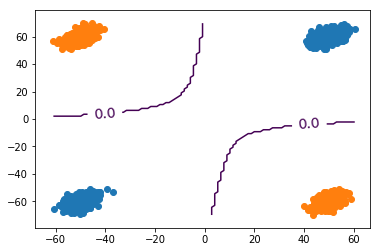

In [20]:
MU1 = np.array([50, 60])
SIGMA1 = np.array([[10, 5], [5, 10]])
PI1 = 0.5
MU2 = np.array([-50, 60])
SIGMA2 = np.array([[10, 5], [5, 10]])
PI2 = 1-PI1
size = 1000

# 特徴ベクトルと正解ラベル
X, Y = make_data((MU1, MU2), (SIGMA1, SIGMA2), (PI1, PI2), size)

# 線形なSVMによる分類器（ソフトマージンにおける定数はC=1.）
#clf = svm.SVC(kernel='linear', C=1.)
clf = svm.SVC(kernel='rbf', gamma=0.001)
#clf = svm.SVC(kernel = 'poly', degree = 2, C = 1)

# 訓練データによる学習（超平面の決定）
clf.fit(X, Y)


XX1 = np.linspace(X[:,0].min(),X[:,0].max(),100)
XX2 = np.linspace(X[:,1].min(),X[:,1].max(),100)
XX1_grid, XX2_grid = np.meshgrid(XX1, XX2)
XX_grid = np.vstack((XX1_grid.flatten(),XX2_grid.flatten()))


# テストデータの分類
test_y = clf.predict(XX_grid.T)

cont = plt.contour(XX1, XX2, test_y.T.reshape((XX1.shape[0], XX1.shape[0])), levels=[0])
cont.clabel(fmt='%1.1f', fontsize=14)


plt.show()